Data loading and cleaning: Load the dataset into a Pandas DataFrame and perform some basic data cleaning, such as filling in missing values and encoding categorical variables.

## Step 1: Data loading and cleaning

# import modules

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from IPython.display import display
import scipy.stats as st

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# set seaborn style

In [2]:
sns.set_style('darkgrid')

#increase pandas default max_rows to view all columns
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

In [3]:
# read dataset into pandas DataFrames 

train = pd.read_csv('./data/train .csv') 
test  = pd.read_csv('./data/test.csv')

# Get the dimensions of the train and test data
print("Training data set shape : {}".format(train.shape))
print("Testing data set shape : {}".format(test.shape))

Training data set shape : (1460, 81)
Testing data set shape : (1459, 80)


In [4]:
# Get the continuous features
numerical_features = [col for col in train.columns if train.dtypes[col] != 'object']
numerical_features.remove('SalePrice')
numerical_features.remove('Id')

print(numerical_features)

print("count of numerical features:",len(numerical_features))


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
count of numerical features: 36


In [5]:
# Get the categorical features
categorical_features = [col for col in train.columns if train.dtypes[col] == 'object']

print("categorical features")
print(categorical_features)

print("count of categorical features:",len(categorical_features))

categorical features
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
count of categorical features: 43


In [6]:
print('unique column values')
train.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(16)


unique column values


Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        328
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
dtype: int64

## Cardinality of categorical columns in training data

In [7]:
cardinality = train[categorical_features].apply(lambda x: len(x.unique()))
cardinality.sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
BsmtFinType2      7
Functional        7
GarageType        7
BsmtFinType1      7
Heating           6
Foundation        6
Electrical        6
SaleCondition     6
RoofStyle         6
GarageQual        6
GarageCond        6
FireplaceQu       6
HeatingQC         5
Fence             5
MiscFeature       5
MSZoning          5
BsmtExposure      5
MasVnrType        5
LotConfig         5
BsmtCond          5
BldgType          5
BsmtQual          5
ExterCond         5
KitchenQual       4
ExterQual         4
GarageFinish      4
PoolQC            4
LandContour       4
LotShape          4
PavedDrive        3
Alley             3
LandSlope         3
CentralAir        2
Street            2
Utilities         2
dtype: int64

## Cardinality of categorical columns in test data

In [8]:
cardinality = test[categorical_features].apply(lambda x: len(x.unique()))
cardinality.sort_values(ascending=False).head(40)

Neighborhood     25
Exterior2nd      16
Exterior1st      14
SaleType         10
Condition1        9
Functional        8
GarageType        7
BsmtFinType2      7
BsmtFinType1      7
HouseStyle        7
MSZoning          6
GarageCond        6
FireplaceQu       6
Foundation        6
SaleCondition     6
RoofStyle         6
BsmtQual          5
BsmtCond          5
KitchenQual       5
HeatingQC         5
GarageQual        5
Condition2        5
BsmtExposure      5
Fence             5
BldgType          5
ExterCond         5
MasVnrType        5
LotConfig         5
LandContour       4
LotShape          4
GarageFinish      4
MiscFeature       4
RoofMatl          4
Heating           4
ExterQual         4
Electrical        4
LandSlope         3
PavedDrive        3
PoolQC            3
Alley             3
dtype: int64

Columns that can be safely ordinal encoded

In [9]:
good_label_cols = [col for col in categorical_features if set(test[col]).issubset(set(train[col]))]
len(good_label_cols)

36

Those are problematic columns that eventually will be dropped

In [10]:
bad_label_cols = list(set(categorical_features)-set(good_label_cols))
bad_label_cols

['KitchenQual',
 'MSZoning',
 'Exterior2nd',
 'Utilities',
 'Functional',
 'Exterior1st',
 'SaleType']

## Missing values

Text(0, 0.5, 'Features')

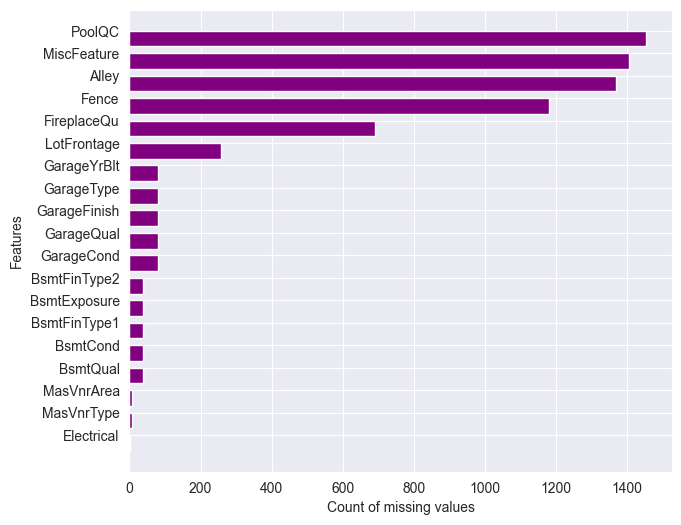

In [11]:
cols_with_missing = train.isnull().sum()
cols_with_missing = cols_with_missing[cols_with_missing>0]
cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))  
width = 0.70 # the width of the bars 
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="purple")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count of missing values')
plt.ylabel('Features') 

*PoolQC*, *MiscFeature*, *Alley*, *Fence*, and *FireplaceQu* have many missing values.

## Count and percentage of missing values in training data

In [12]:
print('Percentage of missing values in each columns')
#train.apply(lambda x: round((x.isna().sum()/len(x))*100,1))
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_tr = pd.concat([total, round(percent*100,2)], axis=1, keys=['Total', 'Percent'])
missing_data_tr[missing_data_tr.Total>=1]
missing_data_tr.style.background_gradient('summer_r')

Percentage of missing values in each columns


,Total,Percent
PoolQC,1453,99.520000
MiscFeature,1406,96.300000
Alley,1369,93.770000
Fence,1179,80.750000
FireplaceQu,690,47.260000
LotFrontage,259,17.740000
GarageYrBlt,81,5.550000
GarageCond,81,5.550000
GarageType,81,5.550000
GarageFinish,81,5.550000


In [13]:
train_null = train.isna().sum()
test_null  = test.isna().sum()
missing = pd.DataFrame(
              data=[train_null, train_null/train.shape[0]*100,
                    test_null, test_null/test.shape[0]*100],
              columns=train.columns,
              index=["Train Null", "Train Null (%)", "Test Null", "Test Null (%)"]
          ).T.sort_values(["Train Null", "Test Null"], ascending=False)

# Filter only columns with missing values
missing = missing.loc[(missing["Train Null"] > 0) | (missing["Test Null"] > 0)]
missing.style.background_gradient('summer_r')

,Train Null,Train Null (%),Test Null,Test Null (%)
PoolQC,1453.000000,99.520548,1456.000000,99.794380
MiscFeature,1406.000000,96.301370,1408.000000,96.504455
Alley,1369.000000,93.767123,1352.000000,92.666210
Fence,1179.000000,80.753425,1169.000000,80.123372
FireplaceQu,690.000000,47.260274,730.000000,50.034270
LotFrontage,259.000000,17.739726,227.000000,15.558602
GarageYrBlt,81.000000,5.547945,78.000000,5.346127
GarageFinish,81.000000,5.547945,78.000000,5.346127
GarageQual,81.000000,5.547945,78.000000,5.346127
GarageCond,81.000000,5.547945,78.000000,5.346127


In [14]:
# Count and percentage of  missing values in testing data
print('Percentage of missing values in each columns')
#test.apply(lambda x: round((x.isna().sum()/len(x))*100,1))
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_te = pd.concat([total, round(percent*100,2)], axis=1, keys=['Total', 'Percent'])
missing_data_te[missing_data_te.Total>=1].style.background_gradient('summer_r')

Percentage of missing values in each columns


,Total,Percent
PoolQC,1456,99.790000
MiscFeature,1408,96.500000
Alley,1352,92.670000
Fence,1169,80.120000
FireplaceQu,730,50.030000
LotFrontage,227,15.560000
GarageYrBlt,78,5.350000
GarageQual,78,5.350000
GarageFinish,78,5.350000
GarageCond,78,5.350000


In [15]:
def diff_color(x):
    color = 'red' if x<0 else ('green' if x > 0 else 'black')
    return f'color: {color}'
missing_data_tr_c=missing_data_tr[missing_data_tr.Total>=1]
missing_data_te_c=missing_data_te[missing_data_te.Total>=1]
(missing_data_tr_c.describe() - missing_data_te_c.describe())[missing_data_tr_c.columns].T.iloc[:,1:].style\
        .bar(subset=['mean', 'std'], align='mid', color=['#d65f5f', '#5fba7d'])\
        .applymap(diff_color, subset=['min', 'max'])

,mean,std,min,25%,50%,75%,max
Total,154.457735,98.328532,0.000000,36.000000,65.000000,396.500000,-3.000000
Percent,10.567895,6.715134,0.000000,2.460000,4.450000,27.150000,-0.270000


We can observe that :

- **Numerical columns**: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold
- **Categorical columns**: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities
- There are **problematic** categories: Exterior2nd, Functional, Exterior1st, Utilities, KitchenQual, SaleType, MSZoning
- PoolQC, MiscFeature, Alley, and Fence) have over 50% missing values

In [16]:
train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [17]:
def diff_color(x):
    color = 'red' if x<0 else ('green' if x > 0 else 'black')
    return f'color: {color}'

(train.describe() - test.describe())[numerical_features].T.iloc[:,1:].style\
        .bar(subset=['mean', 'std'], align='mid', color=['#d65f5f', '#5fba7d'])\
        .applymap(diff_color, subset=['min', 'max'])

,mean,std,min,25%,50%,75%,max
MSSubClass,-0.481081,-0.446309,0.000000,0.000000,0.000000,0.000000,0.000000
LotFrontage,1.469601,1.907910,0.000000,1.000000,2.000000,0.000000,113.000000
LotArea,697.667013,5025.747605,-170.000000,162.500000,79.500000,84.000000,158645.000000
OverallQual,0.020494,-0.053815,0.000000,0.000000,0.000000,0.000000,0.000000
OverallCond,0.021538,-0.000940,0.000000,0.000000,0.000000,0.000000,0.000000
YearBuilt,-0.089971,-0.187167,-7.000000,1.000000,0.000000,-1.000000,0.000000
YearRemodAdd,1.202971,-0.485060,0.000000,4.000000,2.000000,0.000000,0.000000
MasVnrArea,2.976120,3.440306,0.000000,0.000000,0.000000,2.000000,310.000000
BsmtFinSF1,4.436022,0.830049,0.000000,0.000000,33.000000,-41.250000,1634.000000
BsmtFinSF2,-6.070026,-15.434653,0.000000,0.000000,0.000000,0.000000,-52.000000


In [18]:
test.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Id,1459.000000,2190.000000,421.321334,1461.000000,1825.500000,2190.000000,2554.500000,2919.000000
MSSubClass,1459.000000,57.378341,42.746880,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1232.000000,68.580357,22.376841,21.000000,58.000000,67.000000,80.000000,200.000000
LotArea,1459.000000,9819.161069,4955.517327,1470.000000,7391.000000,9399.000000,11517.500000,56600.000000
OverallQual,1459.000000,6.078821,1.436812,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1459.000000,5.553804,1.113740,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1459.000000,1971.357779,30.390071,1879.000000,1953.000000,1973.000000,2001.000000,2010.000000
YearRemodAdd,1459.000000,1983.662783,21.130467,1950.000000,1963.000000,1992.000000,2004.000000,2010.000000
MasVnrArea,1444.000000,100.709141,177.625900,0.000000,0.000000,0.000000,164.000000,1290.000000
BsmtFinSF1,1458.000000,439.203704,455.268042,0.000000,0.000000,350.500000,753.500000,4010.000000


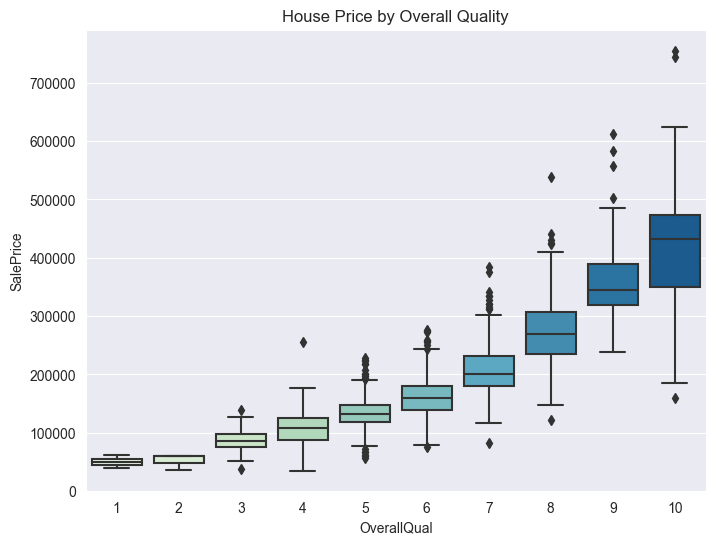

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='GnBu')
title = plt.title('House Price by Overall Quality')

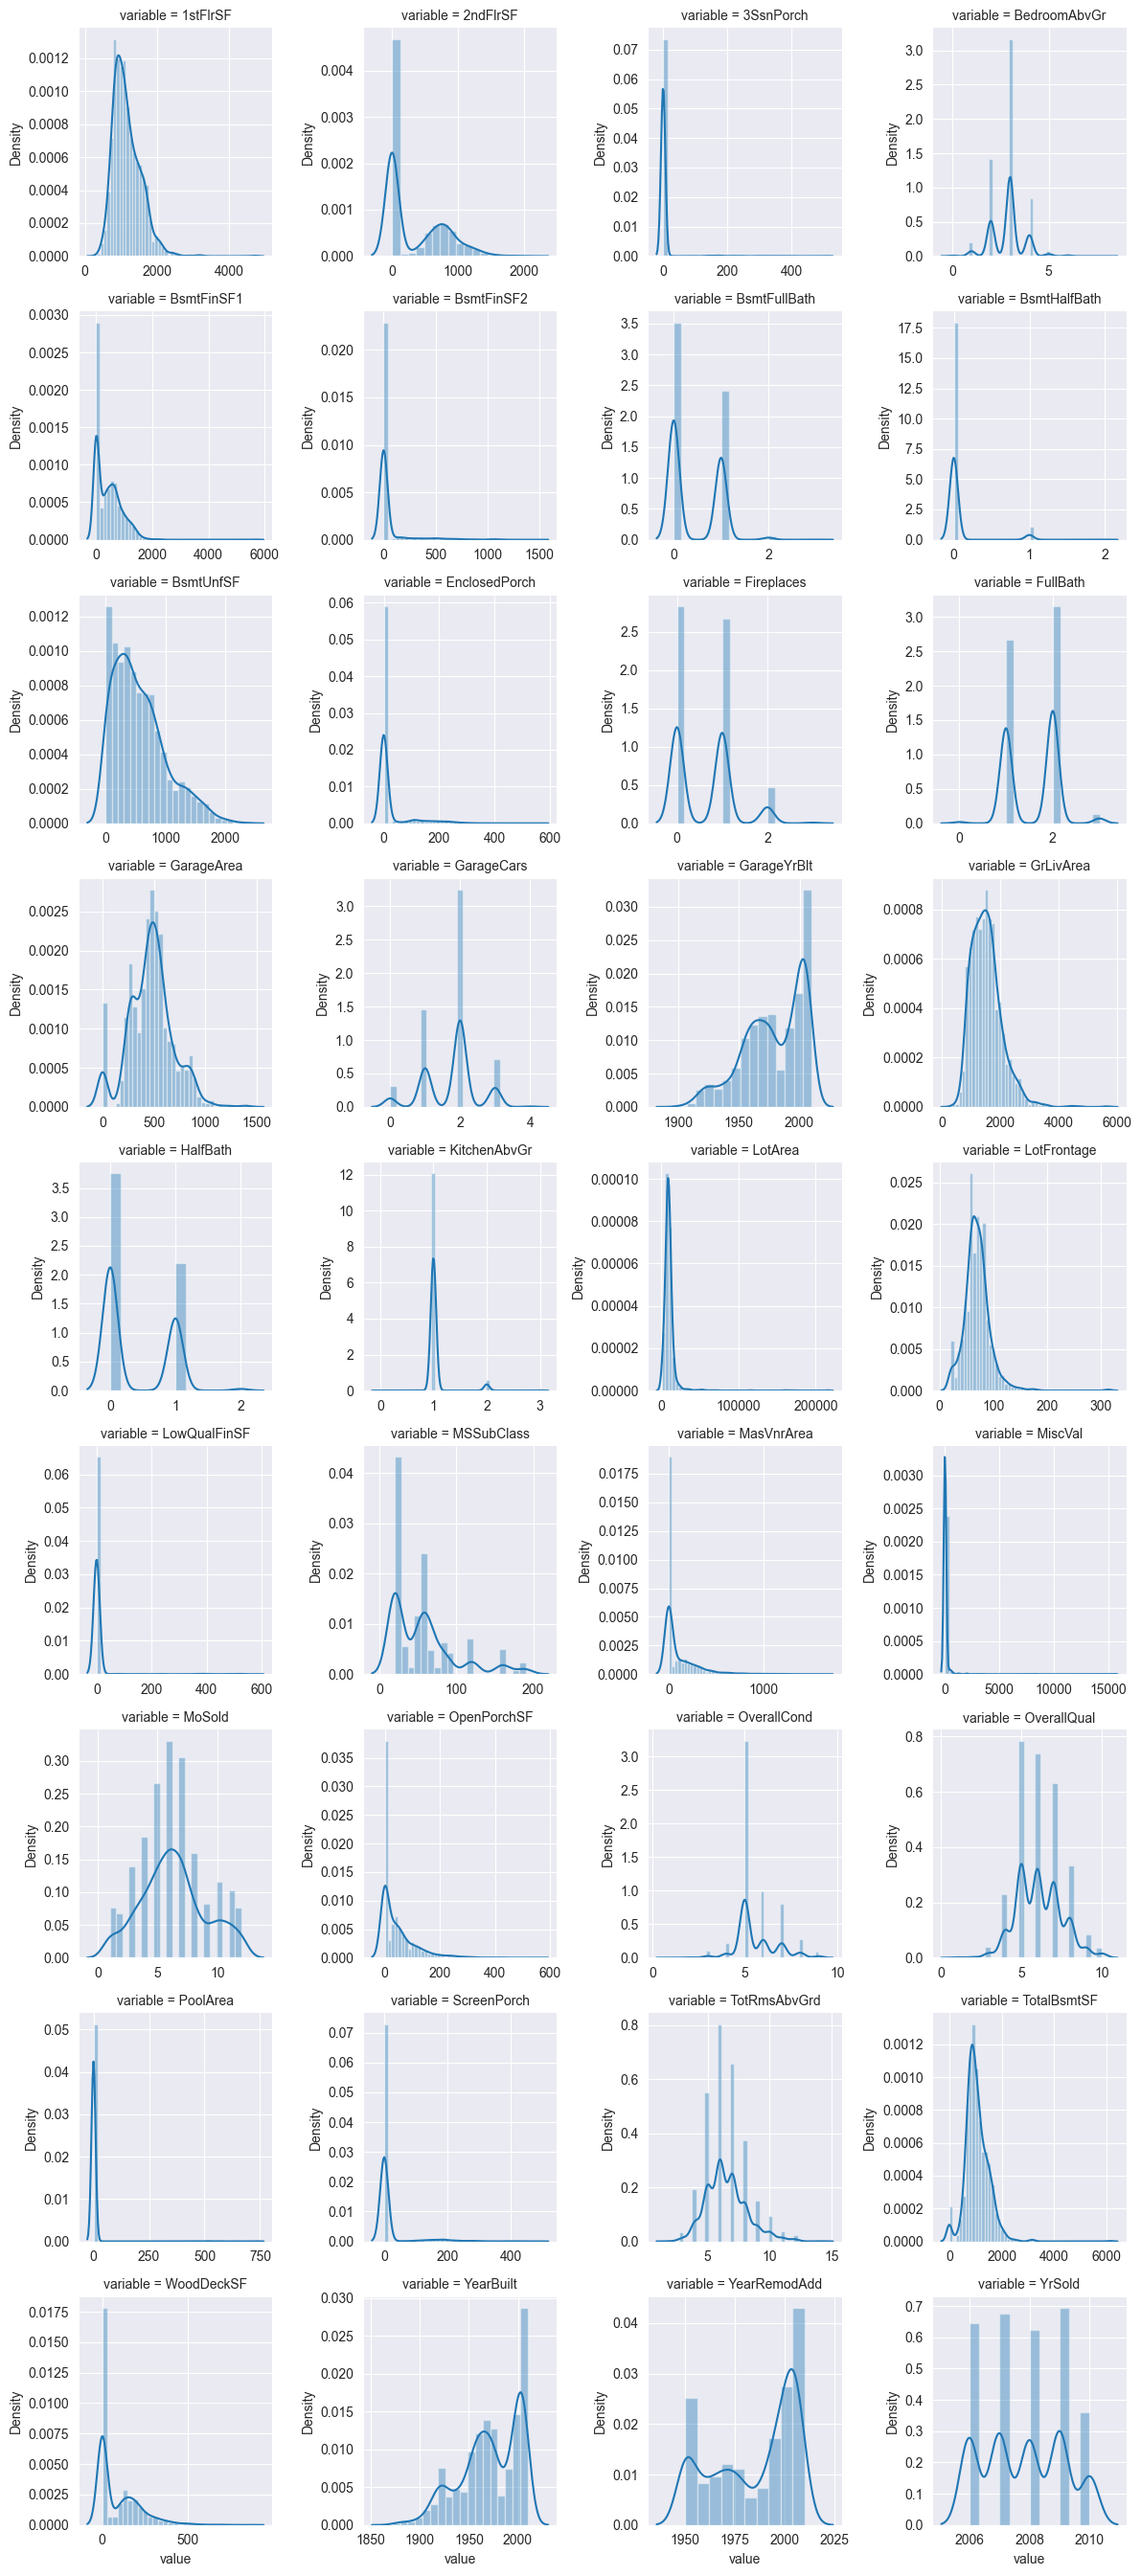

In [20]:
# Grid of distribution plots of all numerical features
f = pd.melt(train, value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

## Analyzing SalePrice

In [ ]:
train['SalePrice'].describe()

: 

In [ ]:
# Histogram -  To get an idea of the distribution.
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.hist(train['SalePrice'])

plt.subplot(2,2,2)
sns.distplot(train['SalePrice'], color="r", kde=True)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

plt.subplot(2,2,3)
plt.scatter(range(train.shape[0]), train["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price")

plt.show()

: 

In [ ]:
sns.distplot(train['SalePrice'], kde=False, color="g")

: 

In [ ]:
print("Skew:",      train['SalePrice'].skew())
print("Kurtosis: ", train['SalePrice'].kurtosis())

: 

Distribution of numerical features

In [ ]:
train[numerical_features].hist(bins=20, figsize=(12, 22), edgecolor="black", color="green",
                    layout=(12, 4))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

: 

In [ ]:
train.corr(method='spearman')

: 

In [ ]:
mask = np.triu(np.ones_like(train.corr(method='spearman')))
sns.heatmap(train.corr(method='spearman'), cmap="RdBu",vmin=-1, vmax=1,square=True, mask = mask)

: 

In [ ]:
# Plot variables with more than 5% missing values
missing.loc[missing["Train Null (%)"] > 5, ["Train Null (%)", "Test Null (%)"]].iloc[::-1].plot.barh(figsize=(8,6))
plt.title("Variables With More Than 5% Missing Values")
plt.show()

: 

In [ ]:
correlation = train[numerical_features].corr(method='spearman')
display(correlation)
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=1)

: 

In [ ]:
sns.clustermap(train[numerical_features].corr(method='spearman'), center=0,
                   cmap="vlag",annot = False,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13)).ax_row_dendrogram.remove()

: 

In [ ]:
numeric_feats = train.select_dtypes(include=[np.number])

: 

In [ ]:
correlation = numeric_feats.corr(method='spearman')
display(correlation)
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=1)

: 

In [ ]:
k = 10 #number of variables for heatmap
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.clustermap(cm, center=0, cmap="vlag", yticklabels=cols.values, xticklabels=cols.values,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(8, 8)).ax_row_dendrogram.remove()

: 

: 